In [115]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gc
from scipy.signal import find_peaks
import sys
from pandas import datetime
from pandas import concat
from sklearn.metrics import mean_squared_error


/home/joao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [116]:
PATH_DATA_es = '/home/joao/Desktop/AA2-Grupo13/Data/serie_historica_acumulados.csv'
PATH_DATA_it = '/home/joao/Desktop/AA2-Grupo13/Data/dpc-covid19-ita-regioni2.csv'

In [117]:
d_name_es = {
'AN':'Andalucía',
'AR':'Aragón',
'AS':'Asturias',
'IB':'Baleares',
'CN':'Canarias',
'CB':'Cantabria',
'CM':'Castilla La Mancha',
'CL':'Castilla y León',
'CT':'Cataluña',
'CE':'Ceuta',
'VC':'C. Valenciana',
'EX':'Extremadura',
'GA':'Galicia',
'MD':'Madrid',
'ML':'Melilla',
'MC':'Murcia',
'NC':'Navarra',
'PV':'País Vasco',
'RI':'La Rioja'
}

d_ccaa_es = {
'Andalucía': 'Andalucía',
'Aragón': 'Aragón',
'Asturias': 'Principado de Asturias',
'Baleares': 'Islas Baleares',
'Canarias': 'Islas Canarias',
'Cantabria':'Cantabria',
'Castilla La Mancha': 'Castilla-La Mancha',
'Castilla y León': 'Castilla y León',
'Cataluña': 'Cataluña',
'Ceuta': 'Ceuta y Melilla',
'C. Valenciana': 'Comunidad Valenciana',
'Extremadura': 'Extremadura',
'Galicia': 'Galicia',
'Madrid': 'Comunidad de Madrid',
'Melilla': 'Ceuta y Melilla',
'Murcia': 'Región de Murcia',
'Navarra': 'Comunidad Foral de Navarra',
'País Vasco': 'País Vasco',
'La Rioja': 'La Rioja'
}

d_ccaa_id_es = {
'Andalucía': "1",
'Aragón' : "2",
'Principado de Asturias': "3",
'Islas Baleares': "4",
'Islas Canarias': "5",
'Cantabria': "6",
'Castilla-La Mancha': "7",
'Castilla y León': "8",
'Cataluña': "9",
'Ceuta y Melilla': "10",
'Comunidad Valenciana': "11",
'Extremadura': "12",
'Galicia': "13",
'Comunidad de Madrid' : "14",
'Ceuta y Melilla': "15",
'Región de Murcia': "16",
'Comunidad Foral de Navarra': "17",
'País Vasco': "18",
'La Rioja': "19"
}

d_ccaa_population_es = {
'Andalucía': 8414240,
'Aragón' : 1319291,
'Principado de Asturias': 1022800,
'Islas Baleares': 1149460,
'Islas Canarias': 2153389,
'Cantabria': 581078,
'Castilla-La Mancha': 2032863,
'Castilla y León': 2399548,
'Cataluña': 7675217,
'Ceuta y Melilla': 171264,
'Comunidad Valenciana': 5003769,
'Extremadura': 1067710,
'Galicia': 2699499,
'Comunidad de Madrid' : 6663394,
'Ceuta y Melilla': 171264,
'Región de Murcia': 1493898,
'Comunidad Foral de Navarra': 654214,
'País Vasco': 2207776,
'La Rioja': 316798
}

d_name_it = {
'Abruzzo': 'Abruzzo',
'Basilicata': 'Basilicata',
'Calabria': 'Calabria',
'Campania': 'Campania',
'Emilia-Romagna': 'Emilia-Romagna',
'Friuli Venezia Giulia': 'Friuli Venezia Giulia',
'Lazio': 'Lazio',
'Liguria': 'Liguria',
'Lombardia': 'Lombardia',
'Marche': 'Marche',
'Molise': 'Molise',
'Piemonte': 'Piemonte',
'Puglia': 'Puglia',
'Sardegna': 'Sardegna',
'Sicilia': 'Sicilia',
'Toscana': 'Toscana',
'P.A. Bolzano': 'P.A. Bolzano',
'P.A. Trento': 'P.A. Trento',
'Umbria': 'Umbria' ,
'Valle d\'Aosta': 'Valle d\'Aosta',
'Veneto': 'Veneto'
}

regione_id_it = {
'Abruzzo': 1,
'Basilicata' : 2,
'Calabria': 3,
'Campania': 4,
'Emilia-Romagna': 5,
'Friuli Venezia Giulia': 6,
'Lazio': 7,
'Liguria': 8,
'Lombardia': 9,
'Marche': 10,
'Molise': 11,
'Piemonte': 12,
'Puglia': 13,
'Sardegna' : 14,
'Sicilia': 15,
'Toscana': 16,
'P.A. Bolzano': 17,
'P.A. Trento': 18,
'Umbria' : 19,
'Valle d\'Aosta': 20,
'Veneto': 21
}

regione_pop_it = {
'Abruzzo': 1311580,
'Basilicata' : 562869,
'Calabria': 1947131,
'Campania': 5801692,
'Emilia-Romagna': 4459477,
'Friuli Venezia Giulia': 1215220,
'Lazio': 5879082,
'Liguria': 1550640,
'Lombardia': 10060574,
'Marche': 1525271,
'Molise': 305617,
'Piemonte': 4356406,
'Puglia': 4029053,
'Sardegna' : 1639591,
'Sicilia': 4999891,
'Toscana': 3729641,
'P.A. Bolzano': 520891,
'P.A. Trento': 117417,
'Umbria' : 882015,
'Valle d\'Aosta': 125666,
'Veneto': 4905854
}

In [132]:
df_es = pd.read_csv(PATH_DATA_es, encoding='latin-1')
df_es.fillna(0, inplace = True)
df_es["CCAA"] = df_es["CCAA"].map(d_name_es)
df_es["CCAA_for_Folium"] = df_es["CCAA"].map(d_ccaa_es)
df_es["id"] = df_es["CCAA_for_Folium"].map(d_ccaa_id_es)

df_es["Population"] = df_es["CCAA_for_Folium"].map(d_ccaa_population_es)


df_es.rename(columns = {"FECHA":"DATE",
                    "CASOS":"TOTAL_INFECTED",
                    "Hospitalizados":"REQUIERED_HOSPITALIZATION",
                    "UCI":"REQUIERED_ADVANCED_CARE",
                    "Fallecidos":"TOTAL_DEATHS",
                    "Recuperados":"CURED"}, inplace = True)

df_es["CCAA"].isnull().sum()
df_es.dropna(inplace = True, axis = "rows") # apagar o texto no fim do ficheiro
df_es["CCAA"].isnull().sum()

def correct_date_es(date_str):
    list_dates = date_str.split("/")
    day = list_dates[0]
    month = list_dates[1]
    year = list_dates[2]
    
    if len(day) == 1:
        day = "0" + day
    if len(month) == 1:
        month = "0" + month
        
    return "/".join([day, month, year])

df_es["NEW_DATE"] = df_es["DATE"].apply(correct_date_es)
df_es["DATE"] = pd.to_datetime(df_es["NEW_DATE"], format='%d/%m/%Y')
df_es = df_es[["id", "CCAA", "DATE", "TOTAL_INFECTED", "REQUIERED_HOSPITALIZATION", "REQUIERED_ADVANCED_CARE", "TOTAL_DEATHS", "CURED","Population"]]
df_es["id"].astype(np.int16)
df_es.head()

,id,CCAA,DATE,TOTAL_INFECTED,REQUIERED_HOSPITALIZATION,REQUIERED_ADVANCED_CARE,TOTAL_DEATHS,CURED,Population
0,1,Andalucía,2020-02-20,0.0,0.0,0.0,0.0,0.0,8414240.0
1,2,Aragón,2020-02-20,0.0,0.0,0.0,0.0,0.0,1319291.0
2,3,Asturias,2020-02-20,0.0,0.0,0.0,0.0,0.0,1022800.0
3,4,Baleares,2020-02-20,1.0,0.0,0.0,0.0,0.0,1149460.0
4,5,Canarias,2020-02-20,1.0,0.0,0.0,0.0,0.0,2153389.0


In [118]:
df_it = pd.read_csv(PATH_DATA_it, encoding='latin-1')
df_it.fillna(0, inplace = True)
df_it["CCAA"] = df_it["denominazione_regione"].map(d_name_it)
df_it["CCAA_for_Folium"] = df_it["denominazione_regione"].map(d_name_it)
df_it["id"] = df_it["CCAA_for_Folium"].map(regione_id_it)

df_it["Population"] = df_it["CCAA_for_Folium"].map(regione_pop_it)

df_it.rename(columns = {"data":"DATE",
                    "totale_casi":"TOTAL_INFECTED",
                    "totale_ospedalizzati":"REQUIERED_HOSPITALIZATION",
                    "terapia_intensiva":"REQUIERED_ADVANCED_CARE",
                    "deceduti":"TOTAL_DEATHS",
                    "dimessi_guariti":"CURED"}, inplace = True)
df_it["CCAA"].isnull().sum()

def correct_date_it(date_str):
    list_dates = date_str.split("-")
    day = list_dates[2]
    month = list_dates[1]
    year = list_dates[0]
        
    return "/".join([day, month, year])



df_it["NEW_DATE"] = df_it["DATE"].apply(correct_date_it)
df_it["DATE"] = pd.to_datetime(df_it["NEW_DATE"], format='%d/%m/%Y')
df_it = df_it[["id", "CCAA", "DATE", "TOTAL_INFECTED", "REQUIERED_HOSPITALIZATION", "REQUIERED_ADVANCED_CARE", "TOTAL_DEATHS", "CURED","Population"]]
df_it["id"].astype(np.int16)
df_it.head(100000)



,id,CCAA,DATE,TOTAL_INFECTED,REQUIERED_HOSPITALIZATION,REQUIERED_ADVANCED_CARE,TOTAL_DEATHS,CURED,Population
0,1,Abruzzo,2020-02-24,0,0,0,0,0,1311580
1,2,Basilicata,2020-02-24,0,0,0,0,0,562869
2,17,P.A. Bolzano,2020-02-24,0,0,0,0,0,520891
3,3,Calabria,2020-02-24,0,0,0,0,0,1947131
4,4,Campania,2020-02-24,0,0,0,0,0,5801692
...,...,...,...,...,...,...,...,...,...
1717,16,Toscana,2020-05-15,9883,305,67,976,5739,3729641
1718,18,P.A. Trento,2020-05-15,4318,62,9,451,3461,117417
1719,19,Umbria,2020-05-15,1422,27,2,73,1259,882015
1720,20,Valle d'Aosta,2020-05-15,1172,37,0,142,953,125666


Test MSE: 1036.393


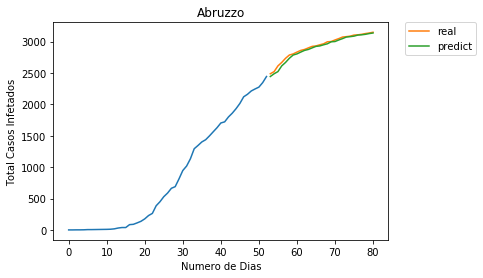

Test MSE: 24.357


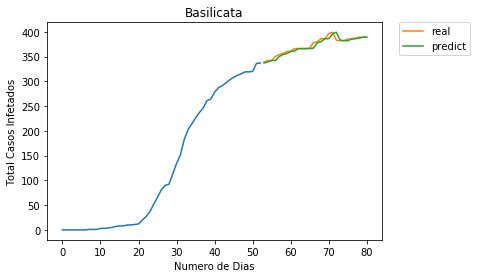

Test MSE: 229.214


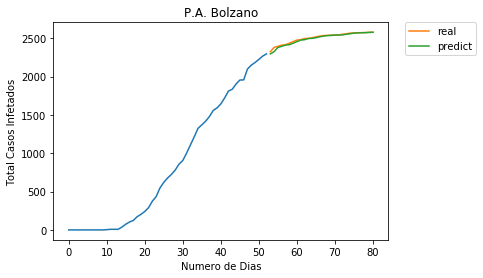

Test MSE: 61.321


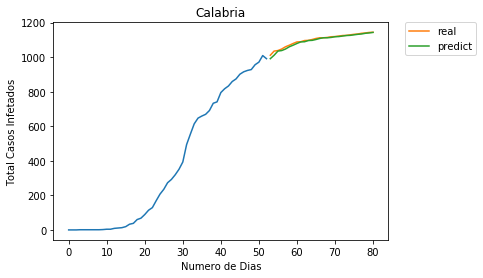

Test MSE: 841.036


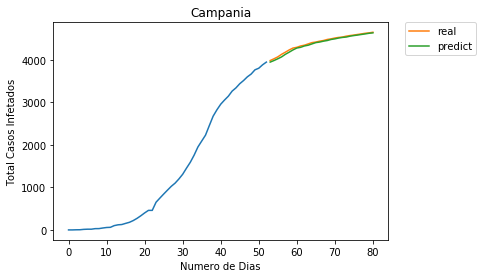

Test MSE: 44807.357


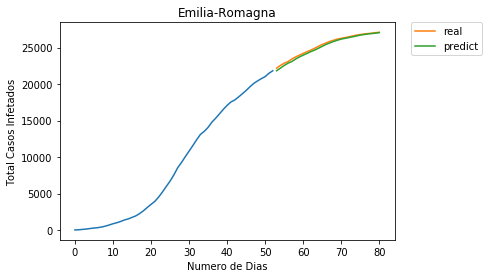

Test MSE: 505.000


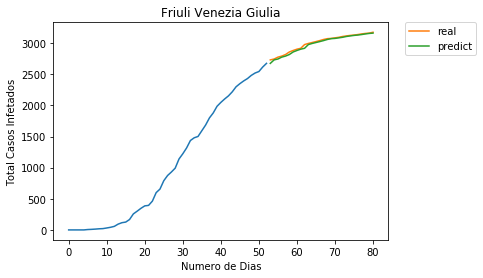

Test MSE: 4959.786


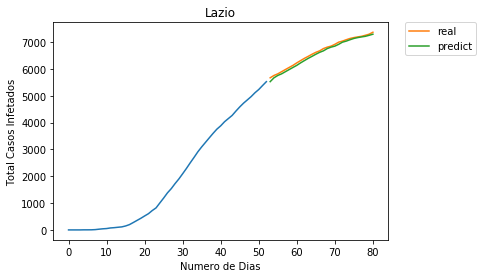

Test MSE: 13087.857


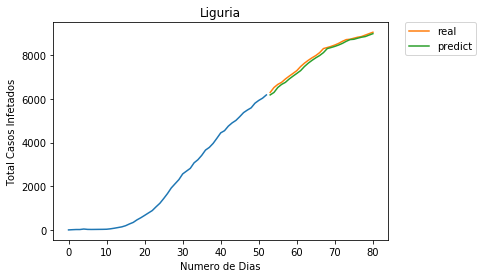

Test MSE: 575267.000


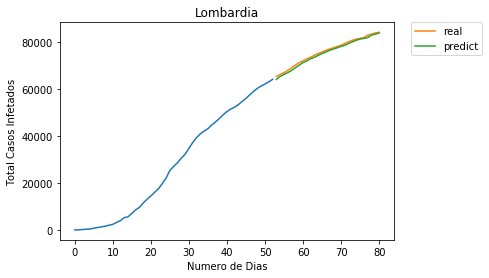

Test MSE: 1392.393


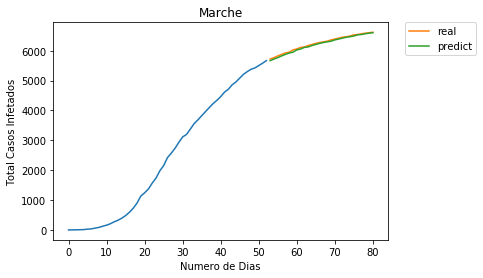

Test MSE: 71.857


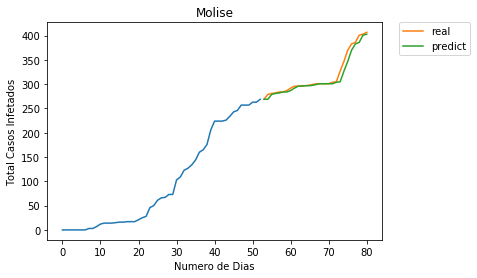

Test MSE: 155013.679


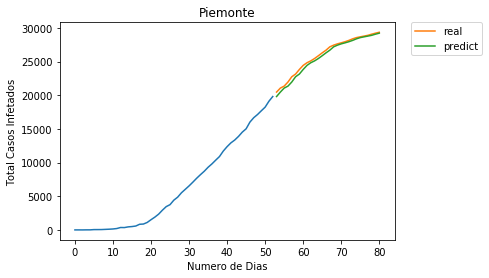

Test MSE: 2349.107


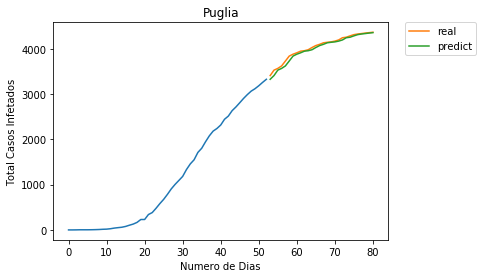

Test MSE: 68.714


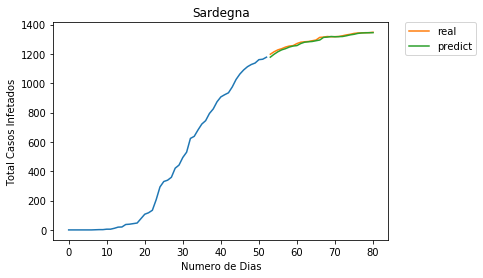

Test MSE: 1013.750


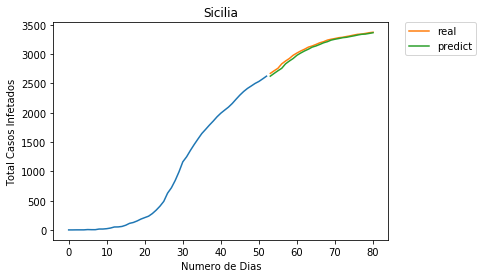

Test MSE: 5720.679


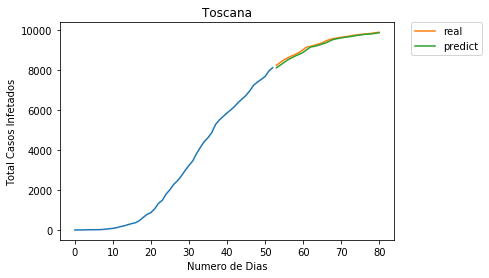

Test MSE: 2039.000


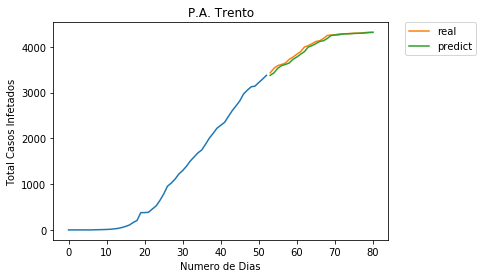

Test MSE: 17.679


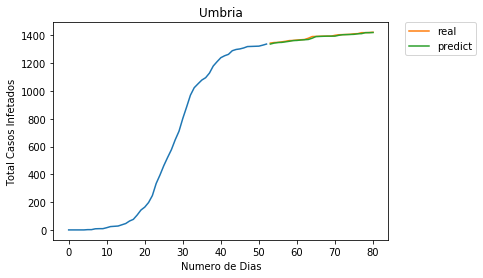

Test MSE: 250.679


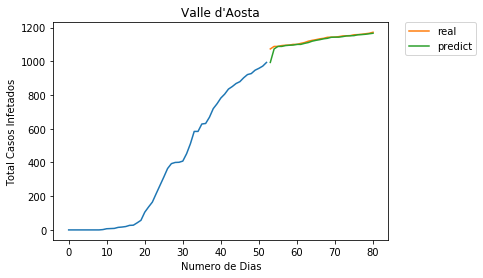

Test MSE: 24798.679


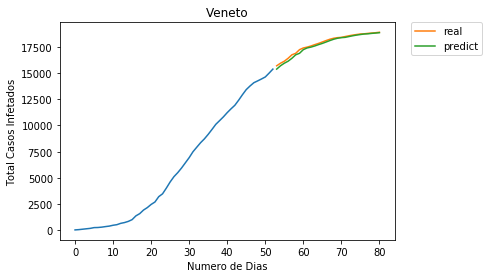

In [149]:
# persistence model
def model_persistence(x):
    return x

x = [day for day in range(len(df_it["DATE"].unique()))]
ccaas = list(df_it["CCAA"].unique())


i=0 
    
while( i < len(ccaas)):
    ccaa = ccaas[i]
    # y = df_it[df_it["CCAA"] == ccaa]["TOTAL_INFECTED"].values

    # plot1 = ax.plot(x, y, color = "k", alpha = 0.7, label = "Escala normal de casos infectados")


    d = {'Data' :df_it[df_it["CCAA"] == ccaa]["DATE"].values ,'Infetados': df_it[df_it["CCAA"] == ccaa]["TOTAL_INFECTED"].values}
    fds_linha = pd.DataFrame(data=d)
    fds = pd.DataFrame(data={"dias":fds_linha.index,'Infetados': df_it[df_it["CCAA"] == ccaa]["TOTAL_INFECTED"].values})

    values = pd.DataFrame(fds["Infetados"])
    dataframe = concat([values.shift(1), values], axis=1)
    dataframe.columns = ['t-1', 't+1']
    


    # split into train and test sets
    X = dataframe.values
    train_size = int(len(X) * 0.66)
    train, test = X[1:train_size], X[train_size:]
    train_X, train_y = train[:,0], train[:,1]
    test_X, test_y = test[:,0], test[:,1]
    

    # walk-forward validation
    predictions = list()
    for x in test_X:
        yhat = model_persistence(x)
        predictions.append(yhat)
    test_score = mean_squared_error(test_y, predictions)
    print('Test MSE: %.3f' % test_score)

    # plot predictions and expected results
    plt.plot(train_y)
    plt.plot([None for i in train_y] + [x for x in test_y],label= "real")
    plt.plot([None for i in train_y] + [x for x in predictions],label ="predict")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title(ccaa)
    plt.xlabel('Numero de Dias') 
    plt.ylabel('Total Casos Infetados') 
    plt.show()

    i += 1
            
            

Test MSE: 77324.409


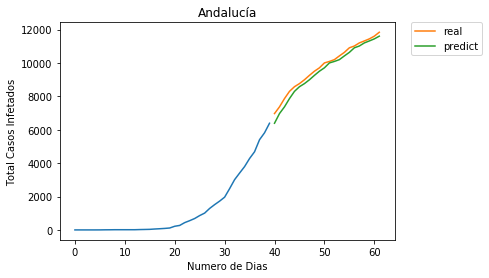

Test MSE: 17990.818


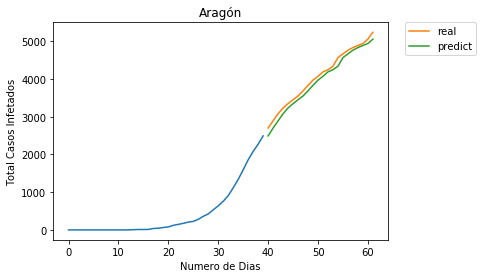

Test MSE: 3081.136


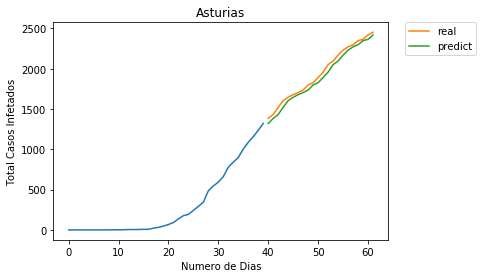

Test MSE: 1394.818


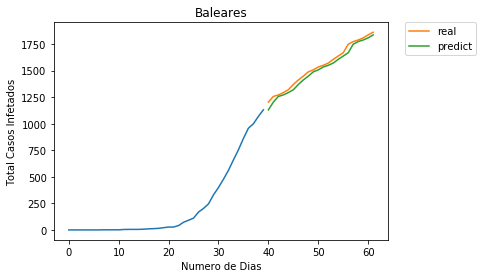

Test MSE: 1556.591


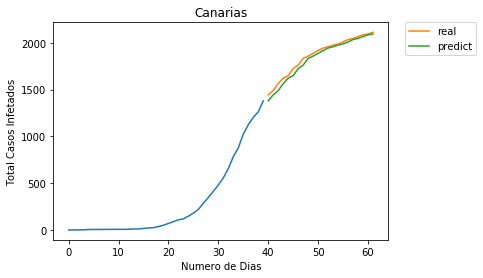

Test MSE: 2427.682


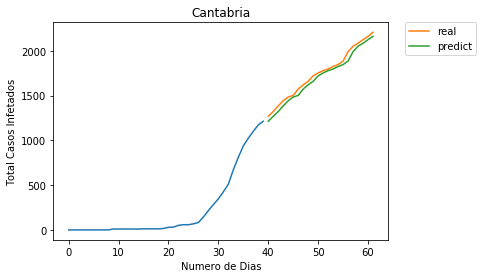

Test MSE: 274061.182


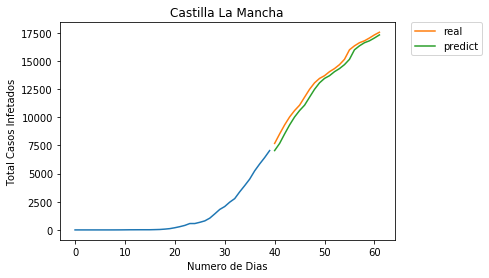

Test MSE: 239539.591


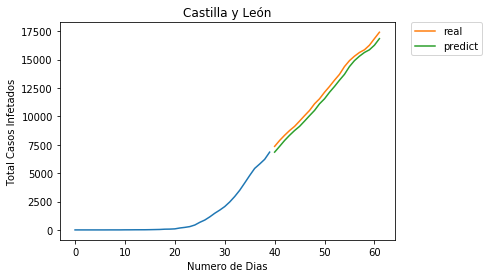

Test MSE: 1408502.409


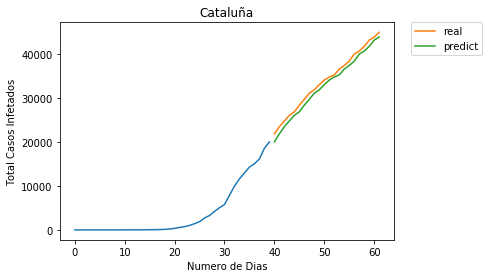

Test MSE: 20.773


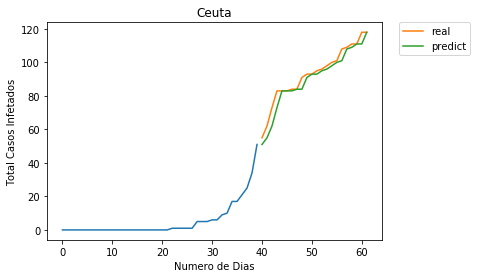

Test MSE: 57964.545


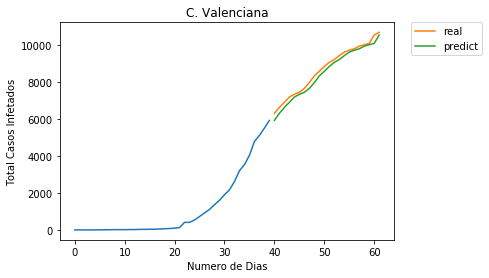

Test MSE: 6773.500


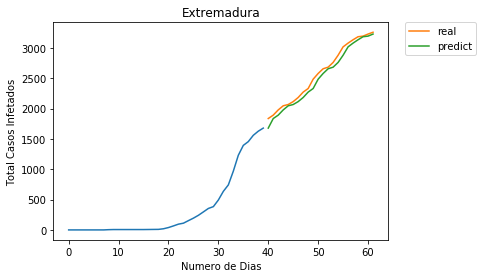

Test MSE: 48431.045


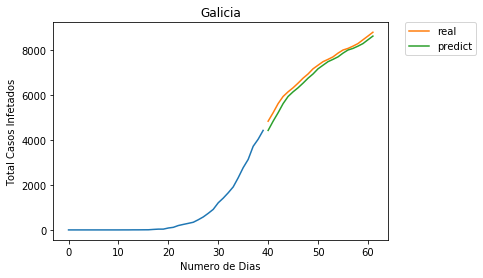

Test MSE: 2175091.591


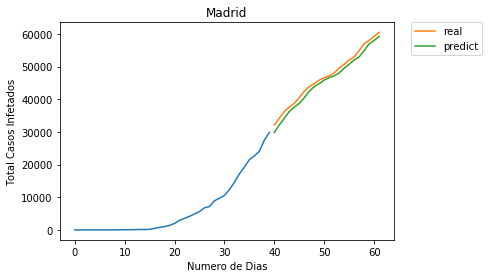

Test MSE: 10.636


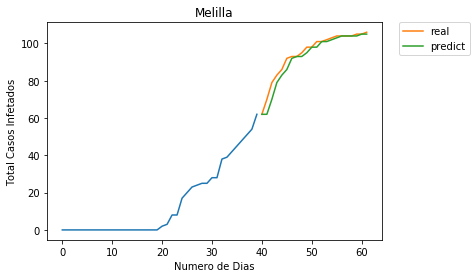

Test MSE: 1247.000


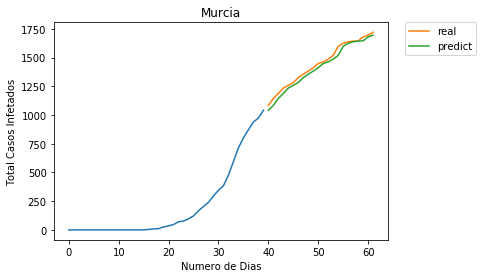

Test MSE: 14066.045


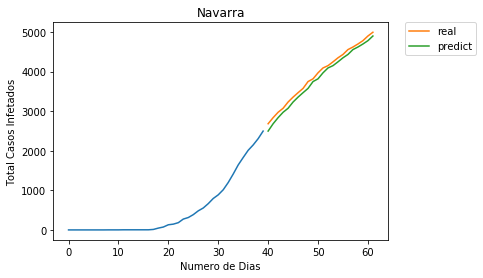

Test MSE: 101924.091


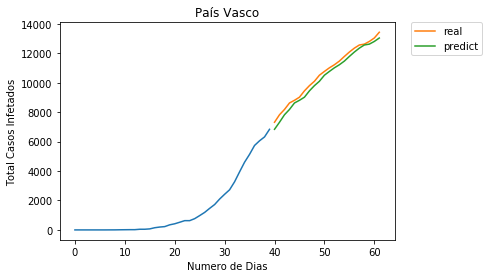

Test MSE: 9782.773


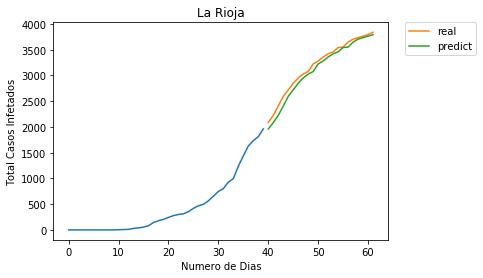

In [151]:
# persistence model
def model_persistence(x):
    return x

x = [day for day in range(len(df_es["DATE"].unique()))]
ccaas = list(df_es["CCAA"].unique())


i=0 
    
while( i < len(ccaas)):
    ccaa = ccaas[i]
    # y = df_it[df_it["CCAA"] == ccaa]["TOTAL_INFECTED"].values

    # plot1 = ax.plot(x, y, color = "k", alpha = 0.7, label = "Escala normal de casos infectados")


    d = {'Data' :df_es[df_es["CCAA"] == ccaa]["DATE"].values ,'Infetados': df_es[df_es["CCAA"] == ccaa]["TOTAL_INFECTED"].values}
    fds_linha = pd.DataFrame(data=d)
    fds = pd.DataFrame(data={"dias":fds_linha.index,'Infetados': df_es[df_es["CCAA"] == ccaa]["TOTAL_INFECTED"].values})

    values = pd.DataFrame(fds["Infetados"])
    dataframe = concat([values.shift(1), values], axis=1)
    dataframe.columns = ['t-1', 't+1']
    


    # split into train and test sets
    X = dataframe.values
    train_size = int(len(X) * 0.66)
    train, test = X[1:train_size], X[train_size:]
    train_X, train_y = train[:,0], train[:,1]
    test_X, test_y = test[:,0], test[:,1]



    # walk-forward validation
    predictions = list()
    for x in test_X:
        yhat = model_persistence(x)
        predictions.append(yhat)
    test_score = mean_squared_error(test_y, predictions)
    print('Test MSE: %.3f' % test_score)

    # plot predictions and expected results
    plt.plot(train_y)
    plt.plot([None for i in train_y] + [x for x in test_y],label= "real")
    plt.plot([None for i in train_y] + [x for x in predictions],label ="predict")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title(ccaa)
    plt.xlabel('Numero de Dias') 
    plt.ylabel('Total Casos Infetados') 
    plt.show()

    i += 1